# Clustering
 
## Hirearchical Clustering
## DBSCAN
## KMeans
## Gaussian Mixture

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
sn.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
purchase_df=pd.read_csv("purchase data.csv")
seg_df=pd.read_csv("segmentation data.csv")

### Data Understanding

In [4]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [5]:
seg_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [7]:
purchase_df["ID"].nunique(),seg_df['ID'].nunique()

(500, 2000)

In [8]:
purchase_df.shape,seg_df.shape

((58693, 24), (2000, 8))

In [12]:
sum(purchase_df['ID'].isin(seg_df['ID']))

0

 purchase_df will be used later for marketing analysis and seg_df will be used for segmenation 

In [3]:
#Removing ID column
# Sex 0 : "Male" & Sex 1 :"Female"
# Education 0 : Under Graduate , 1: Graduate ,2:Masters,3 :PHD
# Occupation : 0 : not employeed ,1 : employeed ,2 :Business owner
# Settlement size 0: small city , 1: mid size city, 2:Big city 
segment_df=seg_df.drop("ID",axis=1)
segment_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


<Axes: >

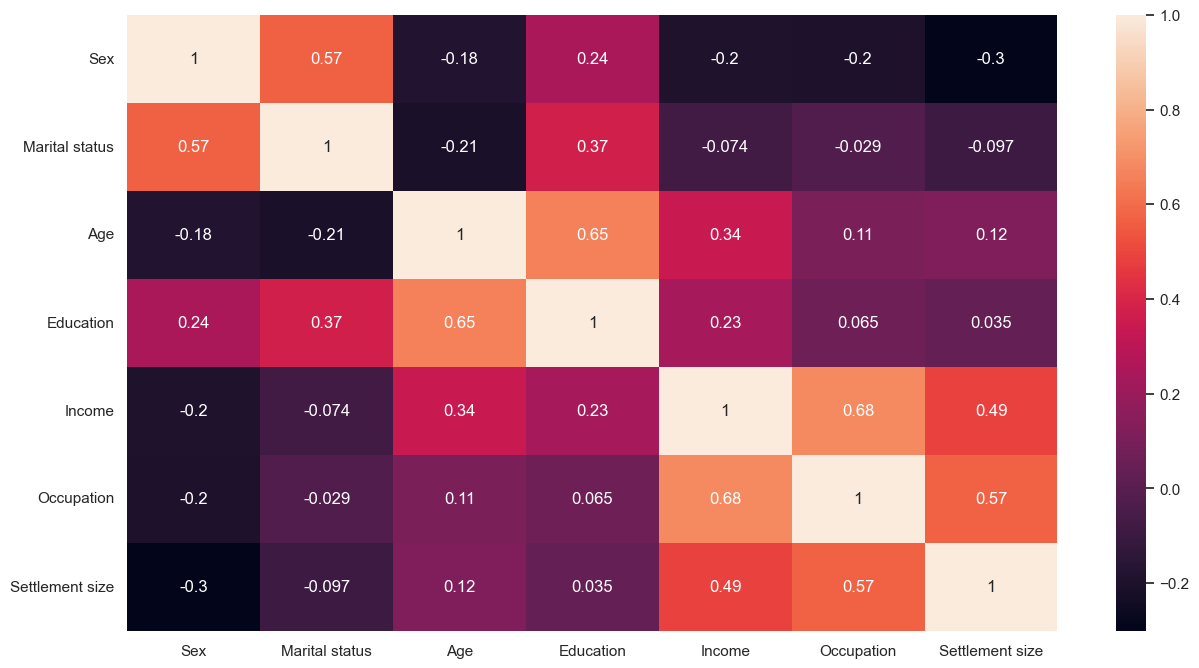

In [25]:
#Correlation and Heat map
cor_matrix=segment_df.corr()
plt.figure(figsize=(15,8))
sn.heatmap(cor_matrix,annot=True)

Text(0.5, 1.0, 'Visualisation of Raw Data')

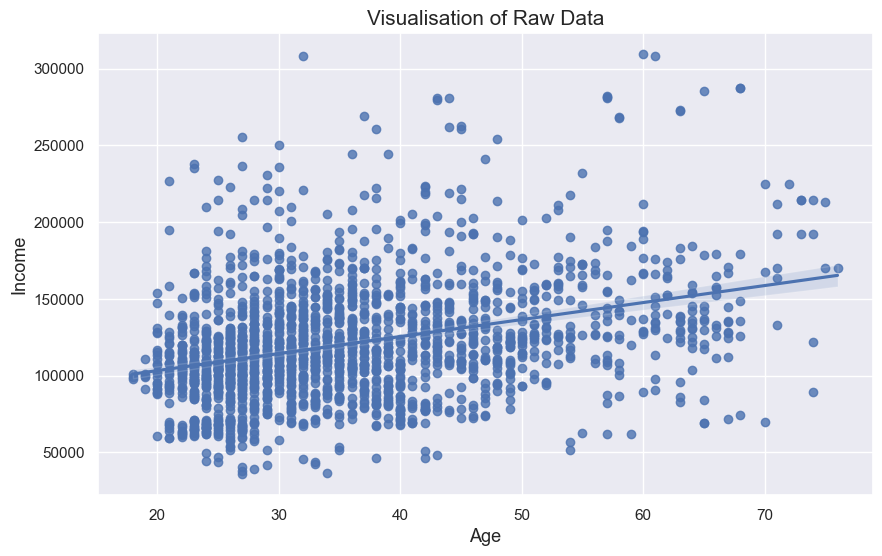

In [30]:
# sex has high correlation with martial status probably because most married person are females
#Marital status has mederately high correlation with education
#Age has good corr with education and income
#Income has high correlation with occupation and settlement size
plt.figure(figsize =(10, 6))
sn.regplot(x=segment_df.iloc[:,2], y=segment_df.iloc[:,4])
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Income', fontsize = 13)
plt.title('Visualisation of Raw Data', fontsize = 15)

In [4]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(segment_df),columns=segment_df.columns)
scaled_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


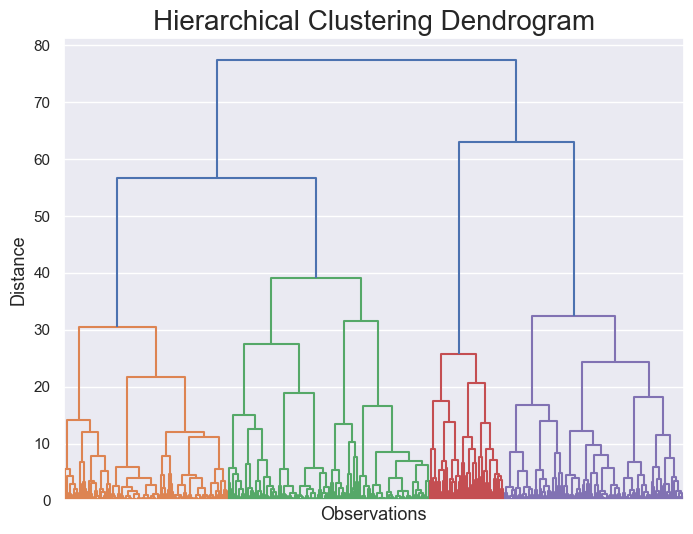

In [40]:
#Plotting dendogram
import scipy.cluster.hierarchy as hc

plt.figure(figsize =(8,6))
plt.title('Hierarchical Clustering Dendrogram', fontsize =20)
plt.ylabel('Distance',  fontsize =13)
plt.xlabel('Observations',  fontsize =13)

dendrogram=hc.dendrogram(hc.linkage(scaled_df,method="ward"),no_labels=True)

plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
hc_model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [43]:
clusters=hc_model.fit_predict(scaled_df)

<Axes: xlabel='Income', ylabel='Age'>

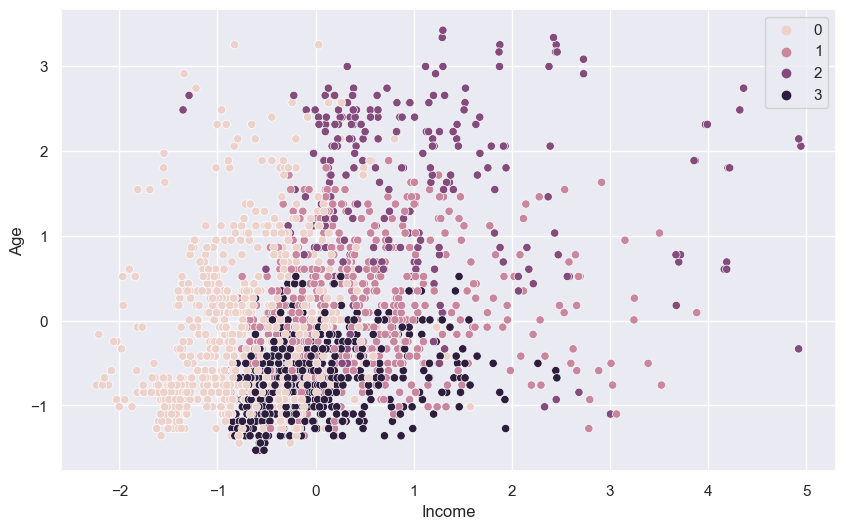

In [45]:
plt.figure(figsize =(10, 6))
sn.scatterplot(data=scaled_df,x="Income",y="Age",hue=clusters)

Although hierarchical clustering is not very practical, it finds the number of clusters in the data, quickly, when there is no prior knowledge about the number of clusters. This is the major advantage over other methods. For this reason, I performed hierarchical clustering first, to determine optimal number of clusters.

In practice, we should find the longest vertical line, which is NOT intercepted by a horizontal line from the dendrogram. It seems that 4 clusters are the most appropriate

## KMeans

In [46]:
from sklearn.cluster import KMeans

In [52]:
#Finding optimal number of clusters
wcss=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(scaled_df)
    iner=model.inertia_
    wcss.append(iner)

In [53]:
wcss

[13999.999999999996,
 10514.607846424868,
 8630.91321689823,
 7169.870822465857,
 6472.969094429679,
 5830.956302961164,
 5481.861346419594,
 5027.950169918703,
 4690.372758820456]

Text(0, 0.5, 'WCSS')

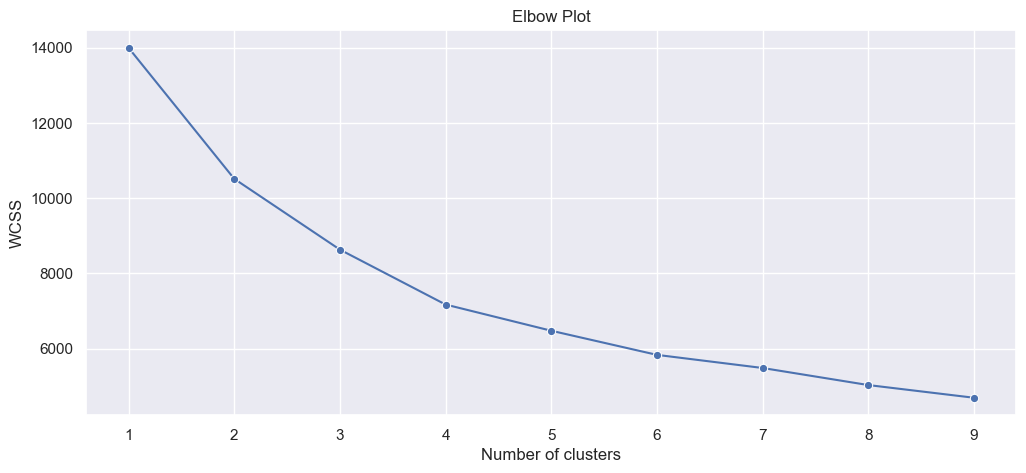

In [56]:
plt.figure(figsize=(12,5))
plt.title("Elbow Plot")
sn.lineplot(x=range(1,10),y=wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [67]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from kneed import KneeLocator
x, y = list(wcss.keys()), list(wcss.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

In [70]:
from kneed import KneeLocator
x, y = list(range(1,10)), wcss
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  4


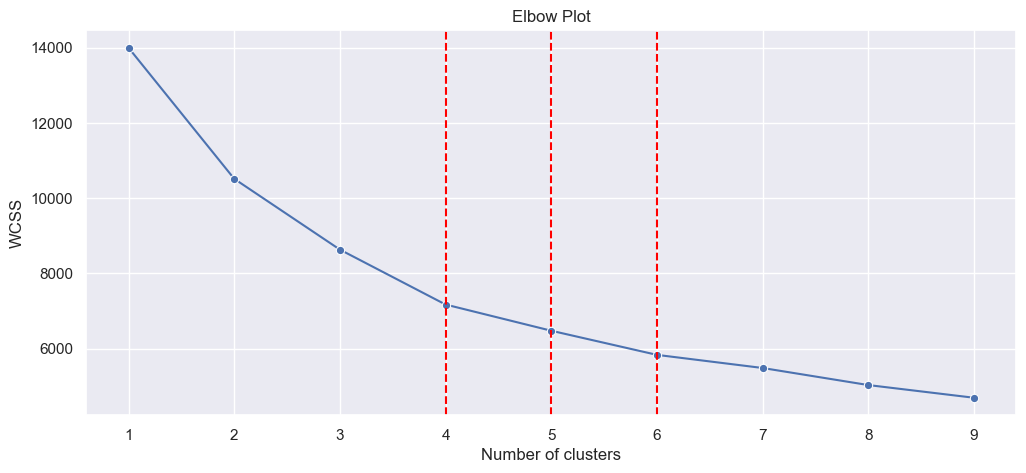

In [59]:
plt.figure(figsize=(12,5))
plt.title("Elbow Plot")
sn.lineplot(x=range(1,10),y=wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.axvline(4,ls="--",c="red")
plt.axvline(5,ls="--",c="red")
plt.axvline(6,ls="--",c="red")

In [61]:
#By looking at the elblow plot 4 is the place were an elbow is formed as is a saturation point 
#The plot also shows 4 and 5 are alsol good choices shiloutte score will give a much more of a  accurate undersnading but is computatioally expensive so we are going with 4 clusters 
kmeans4=KMeans(n_clusters=4,random_state=42)

kmeans4.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [62]:
clusters_kmeans=kmeans4.predict(scaled_df)

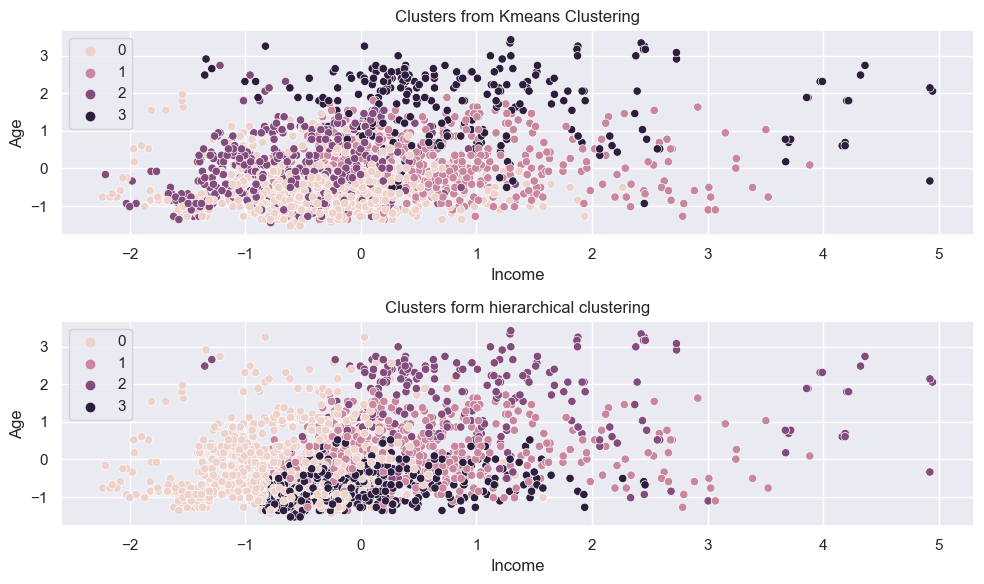

In [71]:
plt.figure(figsize =(10, 6))
plt.subplot(2,1,1)
plt.title("Clusters from Kmeans Clustering")
sn.scatterplot(data=scaled_df,x="Income",y="Age",hue=clusters_kmeans)
plt.subplot(2,1,2)
plt.title("Clusters form hierarchical clustering")
sn.scatterplot(data=scaled_df,x="Income",y="Age",hue=clusters)
plt.tight_layout()

#### Anlaysising the clusters from KMeans 

In [74]:
df_copy=segment_df
df_copy['clusters']=clusters_kmeans

In [75]:
df_copy.groupby('clusters').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
clusters,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


* Cluster 0 : Mostly female who are married with age of 28 and maostly graduate who are employeed  from small city
* cluster 1 : Mostly Male Single Under graduate to graduates with higher income and are employeed as well as few business owners and are from big city
* cluster 2 : mostly male Age about 35 single with low income who are either undergraduate or gradudate who belong to unskilled or unemployeed category from small city
* clsuter 3 almost 50% equal gender ratio and equall matital status with more married with very good education mostly masters and PHD with high income and are employeed or owners as well as live in big an dmid size city


This is just the low level insights explained for more precisice na d visual representation we can create a  asort of snake plot but as we are drafting the project now we will explore various clustering algotitthms the we will explores various method in which we can imporove the performance

### DBSCAN

In [5]:
#Fiding epsilon value using K Nearest Neighbour
# Minpnts : higher than no of dimensions
scaled_df.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [6]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=7)

In [7]:
nn.fit(scaled_df)

NearestNeighbors(n_neighbors=7)

In [8]:
dist,ind=nn.kneighbors(scaled_df)

In [9]:
dist

array([[0.        , 0.09127957, 0.19890495, ..., 0.29818242, 0.31979593,
        0.34143202],
       [0.        , 0.18894246, 0.19214747, ..., 0.33678182, 0.52353408,
        0.53712098],
       [0.        , 0.08676223, 0.15247935, ..., 0.17292285, 0.17342933,
        0.18430694],
       ...,
       [0.        , 0.10924086, 0.17241409, ..., 0.18553819, 0.23976821,
        0.28222113],
       [0.        , 0.00154859, 0.0861633 , ..., 0.08773439, 0.11698379,
        0.17185508],
       [0.        , 0.04693   , 0.07199608, ..., 0.09911725, 0.0997773 ,
        0.09998179]])

In [11]:
dist=np.sort(dist,axis=0)

In [14]:
dist[:,1]

array([3.41213651e-04, 3.41213651e-04, 3.93708059e-04, ...,
       1.99372036e+00, 2.00336412e+00, 2.04510084e+00])

In [15]:
new_dist=dist[:,1]

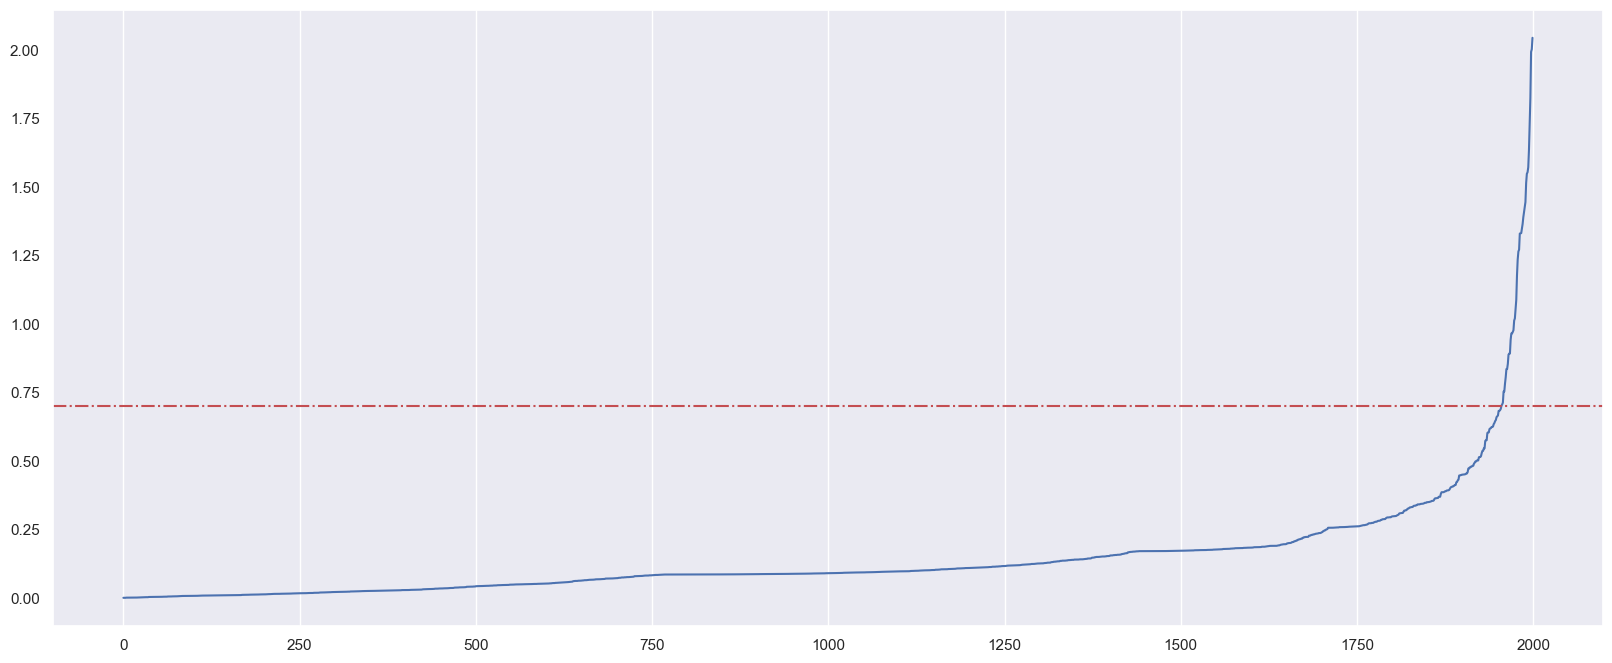

In [40]:
plt.figure(figsize=(20,8))
plt.plot(new_dist)
plt.grid(axis="y")
plt.axhline(y=0.7,color="r",ls="-.")
plt.show()

In [21]:
from sklearn.cluster import DBSCAN

In [41]:
dbscan=DBSCAN(eps=0.7,min_samples=8)

In [42]:
dbscan.fit(scaled_df)

DBSCAN(eps=0.7, min_samples=8)

In [44]:
dbscan.labels_

array([ 0,  1,  2, ..., 16,  6, 16], dtype=int64)

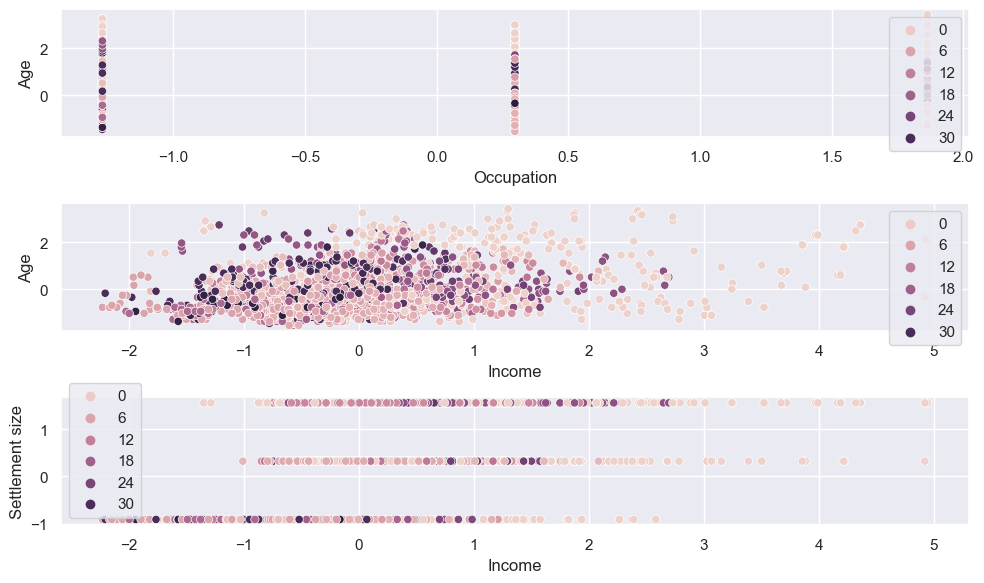

In [45]:
plt.figure(figsize =(10, 6))
plt.subplot(3,1,1)
sn.scatterplot(data=scaled_df,x="Occupation",y="Age",hue=dbscan.labels_)
plt.subplot(3,1,2)
sn.scatterplot(data=scaled_df,x="Income",y="Age",hue=dbscan.labels_)
plt.tight_layout()
plt.subplot(3,1,3)
sn.scatterplot(x=scaled_df['Income'],y=scaled_df['Settlement size'],hue=dbscan.labels_)
plt.tight_layout()

In [46]:
scaled_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [48]:
new_df_dbscan=scaled_df
new_df_dbscan['clusters']=dbscan.labels_
new_df_dbscan['clusters'].unique()

array([ 0,  1,  2,  3, 25, -1,  4, 26,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 22, 18, 19, 21, 20, 24, 23, 29, 27, 28, 30, 31, 32,
       33, 34], dtype=int64)

### Gaussian Mixture models

In [50]:
# import ing library
from sklearn.mixture import GaussianMixture


In [96]:
# selection number of clusters 
#Bayesian information criterion (BIC) and Akaike information criterion (AIC)
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(scaled_df)

GaussianMixture(n_components=3, n_init=10)

In [97]:
gm.weights_

array([0.368, 0.543, 0.089])

In [98]:
gm.means_

array([[ 1.09003844,  1.00702467, -0.23181596,  0.37394444, -0.11843403,
        -0.10753322, -0.20891344],
       [-0.91739884, -0.51971623,  0.1677783 , -0.22461369,  0.1790271 ,
         0.18576517,  0.27595652],
       [ 1.09003844, -0.99302433, -0.06511624, -0.17580133, -0.60256172,
        -0.68874452, -0.81982299]])

In [99]:
gm.covariances_[:,1]


array([[ 0.00000000e+00,  1.00000000e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.30265618e-32,  7.22619832e-01, -1.57785827e-01,
         2.88239084e-01, -5.96118566e-02,  3.52484709e-03,
        -2.61493705e-02],
       [-9.86076132e-32,  1.00000000e-06, -6.64770426e-33,
         4.43180284e-32,  6.75849933e-32,  5.31816341e-32,
         4.21021270e-32]])

In [100]:
gm.converged_

True

In [101]:
gm.n_iter_

20

In [102]:
clusters=gm.predict(scaled_df)

<Axes: xlabel='Age', ylabel='Income'>

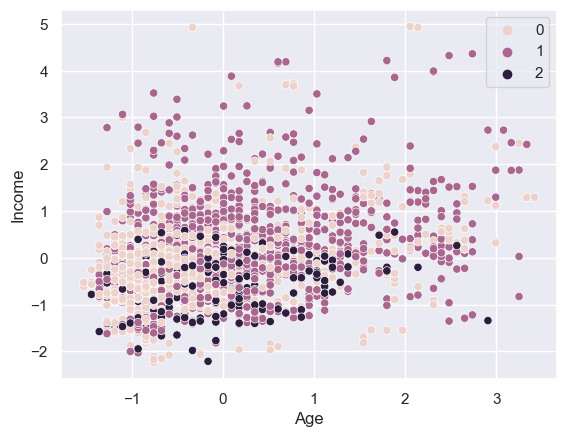

In [103]:
sn.scatterplot(x=scaled_df['Age'],y=scaled_df['Income'],hue=clusters)

In [105]:
gm.predict_proba(scaled_df.head(5))

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [106]:
gm.predict(scaled_df.head(5))

array([1, 0, 1, 1, 1], dtype=int64)

In [107]:
X_new, y_new = gm.sample(6)


In [108]:
X_new,y_new

(array([[ 1.08941821,  1.00578832,  0.78779886,  1.39330599,  1.03227671,
          0.27381412,  1.22996504],
        [ 1.08995432,  1.00895677,  0.62258745,  0.80475564, -0.25474365,
         -1.16026722, -1.0551647 ],
        [ 1.08849381,  1.00943266, -1.04173957, -0.25324497, -1.63352275,
         -1.37618464, -0.56358224],
        [-0.91833541, -0.84531626,  0.4486055 , -0.30101782,  0.05218843,
          1.07212373,  1.21145871],
        [-0.91774044, -1.33370115,  0.17615543, -0.69886695,  0.91536994,
         -0.37946192,  0.93894344],
        [-0.9157879 ,  0.90245444, -0.26547441,  0.7254956 , -0.230671  ,
         -0.10993243,  0.17685614]]),
 array([0, 0, 0, 1, 1, 1]))

In [109]:
gm.score_samples(scaled_df.head(5))

array([-3.76512612,  4.62456927, -0.92639125,  0.08098495, -0.53645577])

In [110]:
densities = gm.score_samples(scaled_df)

In [111]:
density_threshold = np.percentile(densities, 4)
anomalies = scaled_df[densities < density_threshold]

In [112]:
anomalies.shape

(80, 7)

In [113]:
# the number of clusters which has lowest BIC or AIC are optimum number for the clusters
gm.bic(scaled_df)

-5171.887379517474

In [114]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=20, n_init=10)

In [115]:
bgm.fit(scaled_df)
np.round(bgm.weights_, 2)

array([0.1 , 0.  , 0.03, 0.03, 0.04, 0.06, 0.02, 0.05, 0.09, 0.05, 0.02,
       0.08, 0.06, 0.01, 0.08, 0.06, 0.04, 0.03, 0.13, 0.02])

In [117]:
anomalies.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
8,-0.917399,1.007025,2.141515,1.604323,0.804125,-1.269525,-0.909730
9,-0.917399,1.007025,-0.675033,-0.063372,1.409254,1.863171,-0.909730
63,-0.917399,-0.993024,-0.931082,-1.731068,2.793505,0.296823,1.552326
87,-0.917399,-0.993024,0.946616,-0.063372,3.152646,0.296823,0.321298
95,-0.917399,-0.993024,1.885465,1.604323,3.868459,0.296823,0.321298


In [118]:
anomalies.index

Int64Index([   8,    9,   63,   87,   95,  136,  187,  213,  226,  235,  236,
             237,  274,  304,  320,  330,  373,  374,  378,  395,  408,  430,
             606,  615,  637,  684,  714,  744,  756,  763,  784,  818,  887,
             915,  917,  921, 1003, 1004, 1007, 1011, 1015, 1019, 1020, 1022,
            1027, 1029, 1031, 1033, 1037, 1041, 1057, 1060, 1062, 1063, 1067,
            1074, 1075, 1082, 1086, 1091, 1093, 1095, 1097, 1113, 1121, 1124,
            1127, 1142, 1164, 1195, 1203, 1222, 1225, 1258, 1271, 1273, 1285,
            1286, 1287, 1432],
           dtype='int64')

In [80]:
# Interpretation  : BayesianGaussian Mixture models
# Here we do not need to menton number of clusters but the algorith find the number of clusters but the algorith is finding many clsuters 
#So we are going to remove some anomalies and see how the model performs

In [119]:
new_clean_df=scaled_df.drop(anomalies.index,axis=0)

In [120]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)

In [121]:
bgm.fit(new_clean_df)

BayesianGaussianMixture(n_components=10, n_init=10)

In [122]:
bgm.weights_

array([0.127017  , 0.1865577 , 0.0925346 , 0.05053957, 0.07422638,
       0.25191003, 0.00501419, 0.11758587, 0.05578461, 0.03883006])

<Axes: xlabel='Income', ylabel='Age'>

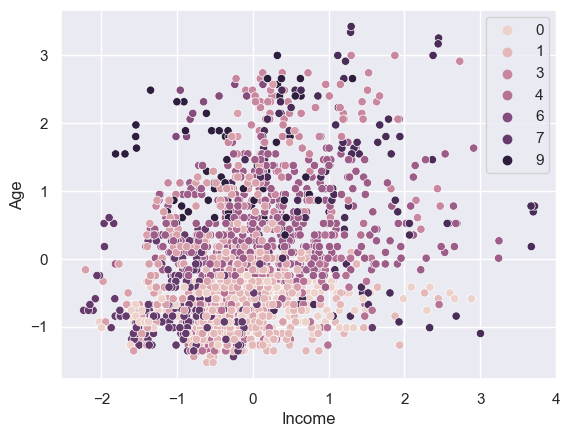

In [125]:
cluster_bgm=bgm.predict(new_clean_df)
sn.scatterplot(data=new_clean_df,x="Income",y="Age",hue=cluster_bgm)